# Data Statistics

This notebook outputs the data distribution as a pie chart for visualization.

In [4]:
from ADUtils import *
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
load_from_npy = False

sequence_counts = {action: 0 for action in actions}  # Initialize counters for each action

if not load_from_npy:
    sequences, labels = [], []
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_path):
            continue
        
        # Filter directory listings to include only numeric values
        sequence_dirs = [d for d in os.listdir(action_path) if d.isdigit()]
        
        for sequence in sorted(sequence_dirs, key=int):  # Convert to int after confirming all are digits
            window = []
            skip_sequence = False
            for frame_num in range(sequence_length):
                sequence_path = os.path.join(action_path, sequence)
                
                # 1. make sure path exists
                if not os.path.exists(sequence_path):
                    skip_sequence = True
                    break
                
                # 2. make sure none are empty
                try:
                    res = np.load(os.path.join(sequence_path, f"{frame_num}.npy"))
                    window.append(res)
                except:
                    skip_sequence = True
                    break
            
            if not skip_sequence:
                # 3. make sure there is at least 30 frames
                if len(window) == sequence_length:
                    sequences.append(window)
                    labels.append(action)  # Assume you have a mapping of actions to numerical labels
                    sequence_counts[action] += 1  # Increment the count for the action

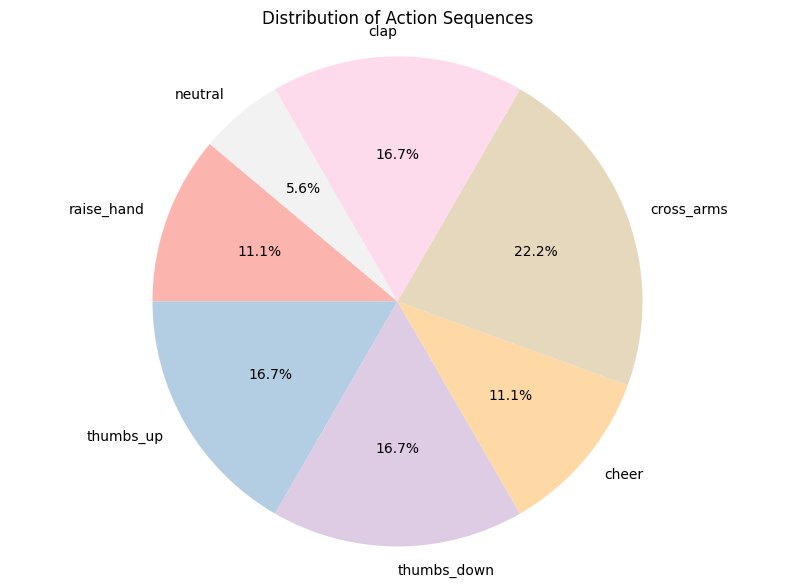

In [17]:
labels = list(sequence_counts.keys())
sizes = list(sequence_counts.values())
colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))  

# Plot
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Action Sequences')
plt.show()